# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [59]:
# if not os.path.exists("malgun.ttf"): 
#     wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
# if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
#     fm.fontManager.addfont("malgun.ttf")
# if plt.rcParams['font.family']!= ["Malgun Gothic"]:
#     plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
# plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
# FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [4]:
# os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [31]:
!sudo apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [55]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [16]:
df = pd.read_csv('/content/drive/MyDrive/KT_aivle/딥러닝/RNN/미니프로젝트/train.csv')
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2


In [ ]:
df.shape

(3706, 2)

### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


In [ ]:
df.describe()

,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [ ]:
df.label.unique()

array(['코드2', '웹', '이론', '코드1', '시스템 운영', '원격'], dtype=object)

In [ ]:
df.isnull().sum()

text     0
label    0
len      0
dtype: int64

## 3.데이터 탐색하기


In [ ]:
df[df['label']=='코드1'][:5]

,text,label
8,첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...,코드1
14,앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...,코드1
16,제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...,코드1
27,안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...,코드1
58,"안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...",코드1


In [ ]:
df[df['label']=='코드2'][:5]

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2
10,만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone 열에도 Solar....,코드2


In [ ]:
df['len']=1

In [ ]:
df1 = df.groupby('label').sum()
df1

,len
label,
시스템 운영,561
원격,100
웹,732
이론,728
코드1,488
코드2,1097


<BarContainer object of 6 artists>

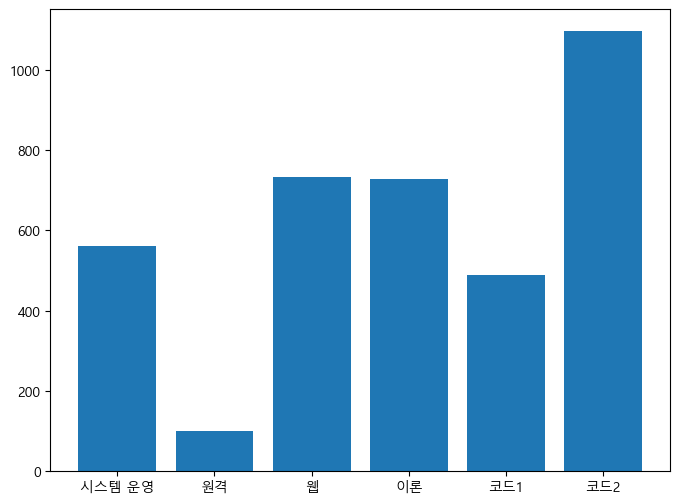

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(height=df1['len'], x=df1.index)

### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

In [9]:
a = []
for i in range(len(df['text'])):
  a.append(len(df['text'][i]))
df['len'] = a
df.head()

,text,label,len
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144


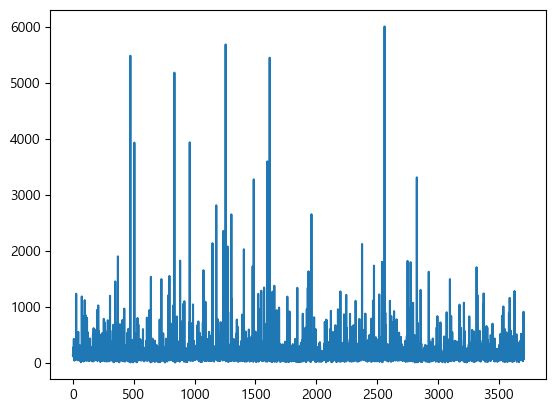

In [ ]:
plt.plot(df['len'])

In [ ]:
pd.DataFrame(df['len'].describe())

,len
count,3706.000000
mean,200.957366
std,330.558868
min,9.000000
25%,68.000000
50%,118.000000
75%,222.000000
max,6012.000000


### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [ ]:
# pip install python-mecab-ko

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from konlpy.tag import Kkma, Komoran
from mecab import MeCab

import time

text = "나는 오늘도 konlpy와 MeCab을 활용하여 자연어 처리를 공부하고 있습니다."

start_time = time.time()
kkma = Kkma()
print("konlpy(Kkma)")
print("품사 태깅: ", kkma.pos(text))
print("명사 추출: ", kkma.nouns(text))
print("처리 시간: ", time.time() - start_time)

start_time = time.time()
komoran = Komoran()
print("konlpy(Komoran)")
print("품사 태깅: ", komoran.pos(text))
print("명사 추출: ", komoran.nouns(text))
print("처리 시간: ", time.time() - start_time)

start_time = time.time()
m = MeCab()
print("MeCab")
print("품사 태깅: ", m.pos(text))
print("처리 시간: ", time.time() - start_time)

konlpy(Kkma)
품사 태깅:  [('나', 'NP'), ('는', 'JX'), ('오늘', 'NNG'), ('도', 'JX'), ('konlpy', 'OL'), ('와', 'JC'), ('MeCab', 'OL'), ('을', 'JKO'), ('활용', 'NNG'), ('하', 'XSV'), ('여', 'ECS'), ('자연어', 'NNG'), ('처리', 'NNG'), ('를', 'JKO'), ('공부', 'NNG'), ('하', 'XSV'), ('고', 'ECE'), ('있', 'VXV'), ('습니다', 'EFN'), ('.', 'SF')]
명사 추출:  ['나', '오늘', '활용', '자연어', '처리', '공부']
처리 시간:  0.033117055892944336
konlpy(Komoran)
품사 태깅:  [('나', 'NP'), ('는', 'JX'), ('오늘', 'NNG'), ('도', 'JX'), ('konlpy', 'SL'), ('와', 'JC'), ('MeCab', 'SL'), ('을', 'ETM'), ('활용', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('자연어', 'NNP'), ('처리', 'NNG'), ('를', 'JKO'), ('공부', 'NNG'), ('하', 'XSV'), ('고', 'EC'), ('있', 'VX'), ('습니다', 'EF'), ('.', 'SF')]
명사 추출:  ['오늘', '활용', '자연어', '처리', '공부']
처리 시간:  2.4367213249206543
MeCab
품사 태깅:  [('나', 'NP'), ('는', 'JX'), ('오늘', 'NNG'), ('도', 'JX'), ('konlpy', 'SL'), ('와', 'JC'), ('MeCab', 'SL'), ('을', 'JKO'), ('활용', 'NNG'), ('하', 'XSV'), ('여', 'EC'), ('자연어', 'NNG'), ('처리', 'NNG'), ('를', 'JKO'), ('공부', 'NNG'), ('하

In [ ]:
def pos_tagging(text):
  tags = m.pos(text)
  # tags = [tag[0] for tag in tags]
  return tags

def analyze_dataframe(df):
  analyzed_data = []
  for text in df['text']:
    tags = pos_tagging(text)
    analyzed_data.append(tags)
  return analyzed_data

df['pos'] = analyze_dataframe(df)

In [ ]:
def pos_tagging(text):
  tags = m.nouns(text)
  # tags = [tag[1] for tag in tags]
  return tags

def analyze_dataframe(df):
  analyzed_data = []
  for text in df['text']:
    tags = pos_tagging(text)
    analyzed_data.append(tags)
  return analyzed_data

df['nouns'] = analyze_dataframe(df)

In [ ]:
df = df.drop(['tags','tags2'], axis=1)

In [ ]:
df.head()

,text,label,len,nouns,pos
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144,"[여기, 커널, 사이즈, 은, 단어, 최대, 길이, 가정, 선언, 것]","[(self, SL), (., SY), (convs, SL), (1, SN), (=..."
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119,"[이미지, 개, 업로드, 자바, 스크립트, 동적, 폼, 개, 생성, 데, 클릭, 뭘...","[(현재, MAG), (이미지, NNG), (를, JKO), (여러, MM), (개..."
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147,"[사용, 때, 질문, 포함, 작동, 것, 질문, 제공, 파일, 폴더, 포함, 폴더,...","[(glob, SL), (., SY), (glob, SL), ((, SSO), (P..."
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279,"[오류, 해결]","[(tmpp, SL), (=, SY), (tmp, SL), (., SY), (gro..."
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144,"[안, 폴더, 안, 이미지, 저장, 걸로, 이해, 실행, 폴더, 이미지, 저장, 질문]","[(filename, SL), (=, SY), (TEST, SL), (_, SY),..."


In [ ]:
def pos_tagging(text):
  tags = m.morphs(text)
  # tags = [tag[1] for tag in tags]
  return tags

def analyze_dataframe(df):
  analyzed_data = []
  for text in df['text']:
    tags = pos_tagging(text)
    analyzed_data.append(tags)
  return analyzed_data

df['pos_0'] = analyze_dataframe(df)

In [ ]:
df.head()

,text,label,len,nouns,pos,pos_0
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2,144,"[여기, 커널, 사이즈, 은, 단어, 최대, 길이, 가정, 선언, 것]","[(self, SL), (., SY), (convs, SL), (1, SN), (=...","[self, ., convs, 1, =, nn, ., ModuleList, (, [..."
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,웹,119,"[이미지, 개, 업로드, 자바, 스크립트, 동적, 폼, 개, 생성, 데, 클릭, 뭘...","[(현재, MAG), (이미지, NNG), (를, JKO), (여러, MM), (개...","[현재, 이미지, 를, 여러, 개, 업로드, 하, 기, 위해, 자바, 스크립트, 로..."
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,코드2,147,"[사용, 때, 질문, 포함, 작동, 것, 질문, 제공, 파일, 폴더, 포함, 폴더,...","[(glob, SL), (., SY), (glob, SL), ((, SSO), (P...","[glob, ., glob, (, PATH, ), 를, 사용, 할, 때, 질문, 입..."
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",코드2,279,"[오류, 해결]","[(tmpp, SL), (=, SY), (tmp, SL), (., SY), (gro...","[tmpp, =, tmp, ., groupby, (, by, =, ', Addr, ..."
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,코드2,144,"[안, 폴더, 안, 이미지, 저장, 걸로, 이해, 실행, 폴더, 이미지, 저장, 질문]","[(filename, SL), (=, SY), (TEST, SL), (_, SY),...","[filename, =, TEST, _, IMAGE, +, str, (, round..."


In [ ]:
a = 0
for i in df['pos_0']:
  a+=len(i)
print(a/len(df))

80.27415002698326


In [ ]:
# 주로 1500보다 작으면 ngram / 크면 sequence 방식 사용
len(df) / (a/len(df))

46.16679215855003

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [ ]:
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"

parser_ko = nltk.RegexParser(grammer)
chunks_ko = parse(pos)

In [ ]:
nouns_lst = df['nouns'].tolist()
# nltk Text 클래스로 변환
nouns_lst = sum(nouns_lst, [])

# 토큰 비율
ttr = len(set(nouns_lst)) / len(nouns_lst)
print(ttr)

0.060026304252520826


In [ ]:
nouns_lst = df['pos_0'].tolist()
# nltk Text 클래스로 변환
nouns_lst = sum(nouns_lst, [])

# 토큰 비율
ttr = len(set(nouns_lst)) / len(nouns_lst)
print(ttr)

0.03719713878505929


[('것', 1093), ('수', 986), ('값', 801), ('데이터', 783), ('문제', 725), ('때', 714), ('코드', 712), ('실습', 609), ('번', 596), ('파일', 581)]


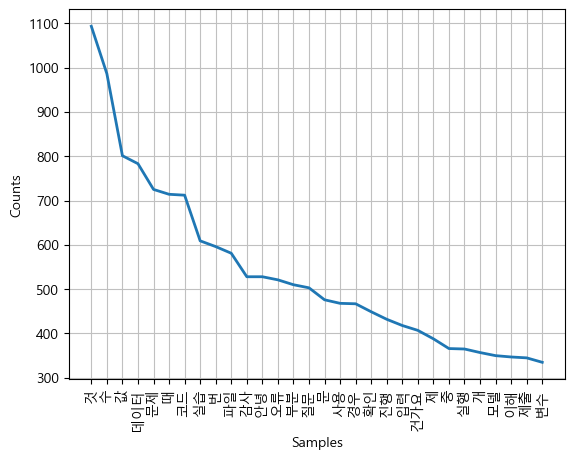

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
from nltk import FreqDist

nouns_list = df['nouns'].tolist()
# nltk Text 클래스로 변환
nouns_list = sum(nouns_list, [])
fdist = FreqDist(nltk.Text(nouns_list))

print(fdist.most_common(10))
fdist.plot(30)

In [ ]:
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder


# BigramCollocationFinder 객체 생성
finder = BigramCollocationFinder.from_documents(nouns_list)

# collocation의 기준을 정할 BigramAssocMeasures 객체 생성
measures = BigramAssocMeasures()

# collocation score 계산
scored = finder.score_ngrams(measures.raw_freq)

# collocation score 출력
for collocation, score in scored:
    print(collocation, score)

('데', '이') 0.007534071860651556
('이', '터') 0.007224327672910137
('문', '제') 0.006668610159609358
('코', '드') 0.006486407696232053
('실', '습') 0.005548065009838933
('파', '일') 0.005384082792799358
('감', '사') 0.004810145033160848
('안', '녕') 0.004810145033160848
('부', '분') 0.0047919247868231174
('오', '류') 0.004746374170978791
('질', '문') 0.0045823919539392174
('사', '용') 0.0044548502295751035
('경', '우') 0.004272647766197799
('가', '요') 0.004126885795495955
('확', '인') 0.004108665549158225
('진', '행') 0.0039902339479629765
('입', '력') 0.0038080314845856714
('모', '델') 0.0037533707455724803
('건', '가') 0.003744260622403615
('실', '행') 0.0033251949566358136
('이', '해') 0.0031794329859339697
('변', '수') 0.003142992493258509
('제', '출') 0.003142992493258509
('출', '력') 0.003142992493258509
('결', '과') 0.0029152394140368777
('방', '법') 0.002860578675023686
('시', '간') 0.0027239268274907077
('스', '트') 0.0026783762116463815
('에', '러') 0.0026328255958020554
('작', '성') 0.0023686320239049634
('해', '결') 0.00235952190073

[('.', 10783), ('(', 6452), (',', 6362), ('-', 5845), (')', 5668), ('_', 5425), ('하', 5410), ('는', 4475), ('이', 4155), ('=', 4081)]


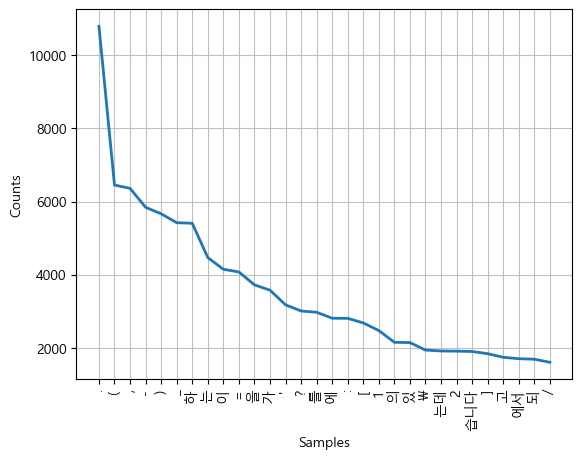

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
import nltk
from nltk import FreqDist

nouns_list = df['pos_0'].tolist()
# nltk Text 클래스로 변환
nouns_list = sum(nouns_list, [])
fdist = FreqDist(nltk.Text(nouns_list))

print(fdist.most_common(10))
fdist.plot(30)

In [ ]:
import nltk
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder


# BigramCollocationFinder 객체 생성
finder = BigramCollocationFinder.from_documents(nouns_list)

# collocation의 기준을 정할 BigramAssocMeasures 객체 생성
measures = BigramAssocMeasures()

# collocation score 계산
scored = finder.score_ngrams(measures.raw_freq)

# collocation score 출력
for collocation, score in scored:
    print(collocation, score)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
('내', '부') 2.5519708871161197e-05
('대', '신') 2.5519708871161197e-05
('돌', '렸') 2.5519708871161197e-05
('동', '시') 2.5519708871161197e-05
('동', '영') 2.5519708871161197e-05
('디', '바') 2.5519708871161197e-05
('딕', '셔') 2.5519708871161197e-05
('런', '지') 2.5519708871161197e-05
('려', '야') 2.5519708871161197e-05
('른', '쪽') 2.5519708871161197e-05
('명', '사') 2.5519708871161197e-05
('박', '스') 2.5519708871161197e-05
('생', '겼') 2.5519708871161197e-05
('선', '형') 2.5519708871161197e-05
('셔', '너') 2.5519708871161197e-05
('승', '차') 2.5519708871161197e-05
('시', '킨') 2.5519708871161197e-05
('시', '킬') 2.5519708871161197e-05
('신', '뢰') 2.5519708871161197e-05
('심', '야') 2.5519708871161197e-05
('에', '선') 2.5519708871161197e-05
('오', '른') 2.5519708871161197e-05
('왼', '쪽') 2.5519708871161197e-05
('요', '도') 2.5519708871161197e-05
('웨', '이') 2.5519708871161197e-05
('유', '형') 2.5519708871161197e-05
('응', '시') 2.5519708871161197e-05
('이', '디') 2.5519708871161197e-05
('적', '합') 2

* 최소 길이 문의 내용에 대해 grammar pasing

In [ ]:
df[df['len'] == df['len'].min()]

,text,label,len,nouns,pos,pos_0
756,원격 부탁드립니다,원격,9,"[원격, 부탁]","[(원격, NNG), (부탁, NNG), (드립니다, VV+EC)]","[원격, 부탁, 드립니다]"
841,지원부탁드립니다!,원격,9,"[지원, 부탁]","[(지원, NNG), (부탁, NNG), (드립니다, VV+EF), (!, SF)]","[지원, 부탁, 드립니다, !]"


In [11]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [12]:
import nltk

# 문장 입력 받기
sentence = df[df['len'] == df['len'].min()]['text'].iloc[0]

# 토큰화
tokens = nltk.word_tokenize(sentence)

# 품사 부착
tagged = nltk.pos_tag(tokens)

# 구문 분석
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
parser = nltk.RegexpParser(grammar)
parsed = parser.parse(tagged)

# 결과 출력
print(parsed)

# 문장구조 (Sentence Structure) / 명사구 (Noun Phrase) / 명사 (Noun)

(S (NP 원격/NN 부탁드립니다/NN))


In [17]:
from nltk.tree import Tree

tree = Tree.fromstring(str(parsed))
tree.pretty_print()

       S           
       |            
       NP          
   ____|______      
원격/NN     부탁드립니다/NN



### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get update -qq

In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128307 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


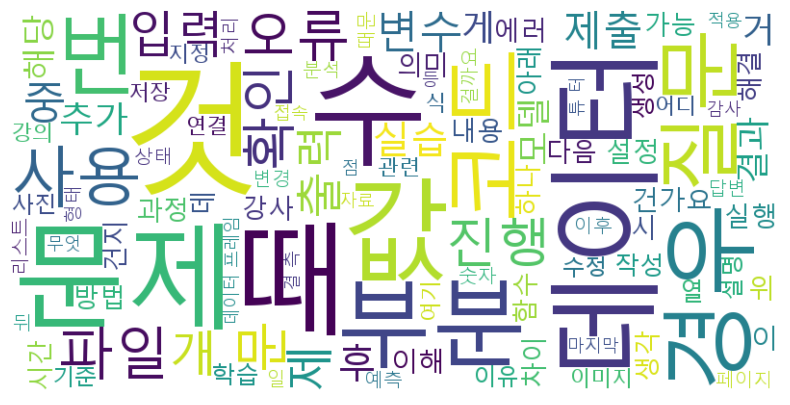

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 데이터프레임에서 nouns 컬럼을 가져와서 리스트로 변환
nouns_list = df['nouns'].tolist()

# 명사들을 하나의 문자열로 합치기
text = ''
for i in nouns_list:
  text += ' '.join(i)

# WordCloud 객체 생성
wordcloud = WordCloud(max_font_size=150, max_words=100, 
                      background_color='white', relative_scaling=0.5,
                      width=800, height=400, font_path='/content/malgun.ttf').generate(text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

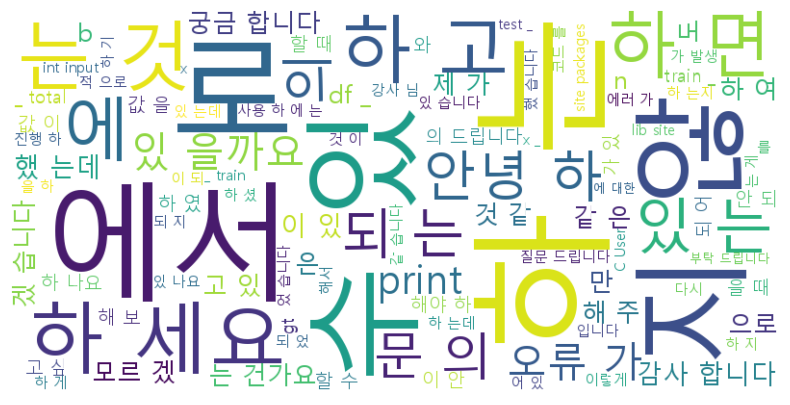

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 데이터프레임에서 nouns 컬럼을 가져와서 리스트로 변환
nouns_list = df['pos_0'].tolist()

# 명사들을 하나의 문자열로 합치기
text = ''
for i in nouns_list:
  text += ' '.join(i)

# WordCloud 객체 생성
wordcloud = WordCloud(max_font_size=150, max_words=100, 
                      background_color='white', relative_scaling=0.5,
                      width=800, height=400, font_path='/content/malgun.ttf').generate(text)

# WordCloud 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [ ]:
def text_analysis(df, label=None):
  """
  label에 따라서 분석, label이 None인 경우 전체 분석
  데이터 확인, 데이터 길이 시각화
  명사 추출하여 분석, 워드 클라우드 시각화

  Parameters
  ----------
  df : pandas DataFrame object.
  label : Label for analysis, default=None.
  - If label is None, Entire data are analyzed.

  Returns
  -------
  result : None

  """

  import matplotlib.pyplot as plt
  from wordcloud import WordCloud

  if label != None:
    df = df[df['label']==label].reset_index(drop=True)
    
  print(df.describe())

  a = []
  for i in range(len(df['text'])):
    a.append(len(df['text'][i]))
  df['len'] = a

  plt.plot(df['len'])
  plt.show()

  def pos_tagging(text):
    tags = m.nouns(text)
    # tags = [tag[1] for tag in tags]
    return tags

  def analyze_dataframe(df):
    analyzed_data = []
    for text in df['text']:
      tags = pos_tagging(text)
      analyzed_data.append(tags)
    return analyzed_data

  df['nouns'] = analyze_dataframe(df)

  import nltk
  from nltk import FreqDist

  nouns_list = df['nouns'].tolist()
  # nltk Text 클래스로 변환
  nouns_list = sum(nouns_list, [])
  fdist = FreqDist(nltk.Text(nouns_list))

  print(fdist.most_common(10))
  fdist.plot(30)



  # 데이터프레임에서 nouns 컬럼을 가져와서 리스트로 변환
  nouns_list = df['nouns'].tolist()

  # 명사들을 하나의 문자열로 합치기
  text = ''
  for i in nouns_list:
    text += ' '.join(i)

  # WordCloud 객체 생성
  wordcloud = WordCloud(max_font_size=150, max_words=100, 
                        background_color='white', relative_scaling=0.5,
                        width=800, height=400, font_path='/content/malgun.ttf').generate(text)

  # WordCloud 시각화
  plt.figure(figsize=(10, 5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

  pass

               len
count  3706.000000
mean    200.957366
std     330.558868
min       9.000000
25%      68.000000
50%     118.000000
75%     222.000000
max    6012.000000


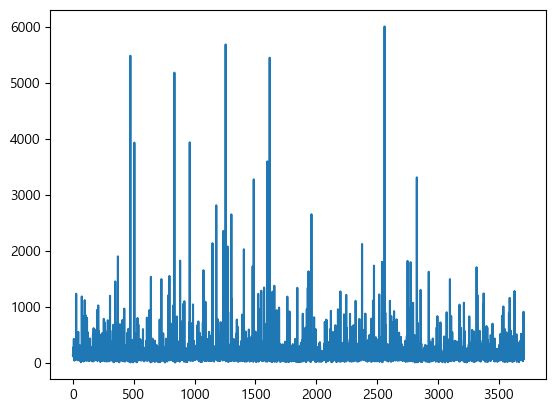

[('것', 1093), ('수', 986), ('값', 801), ('데이터', 783), ('문제', 725), ('때', 714), ('코드', 712), ('실습', 609), ('번', 596), ('파일', 581)]


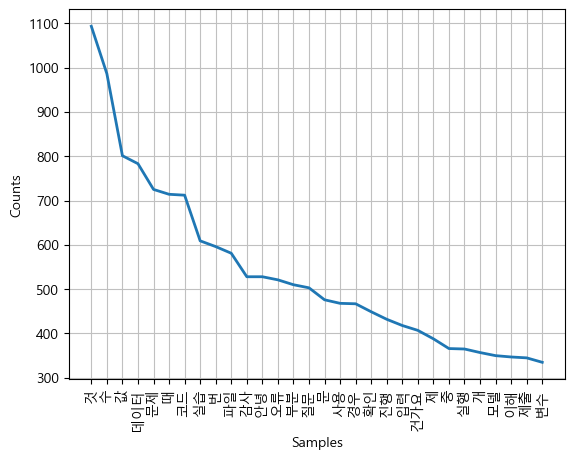

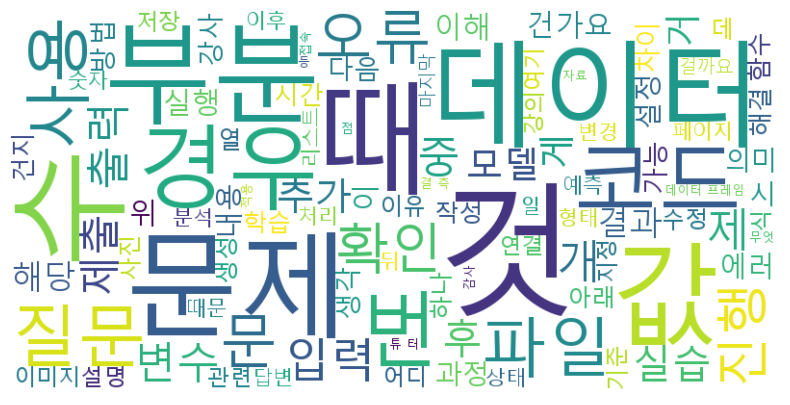

In [ ]:
text_analysis(df)

### 4-2. 각각의 문의 유형에 대해 실행합니다.

시스템 운영
-------------------------------------------
              len
count  561.000000
mean    89.613191
std     71.104840
min     10.000000
25%     46.000000
50%     71.000000
75%    113.000000
max    650.000000


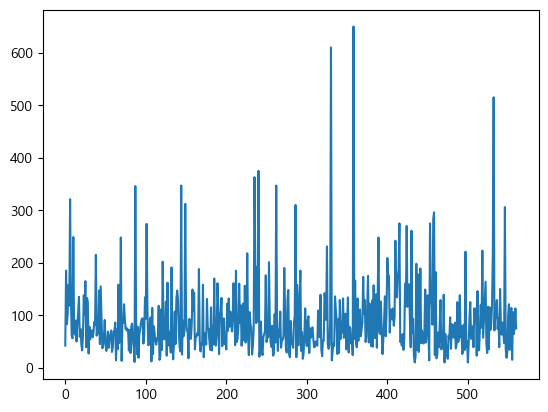

[('제출', 316), ('파일', 224), ('수', 132), ('확인', 125), ('것', 124), ('안녕', 113), ('문제', 112), ('문', 103), ('강의', 103), ('실습', 97)]


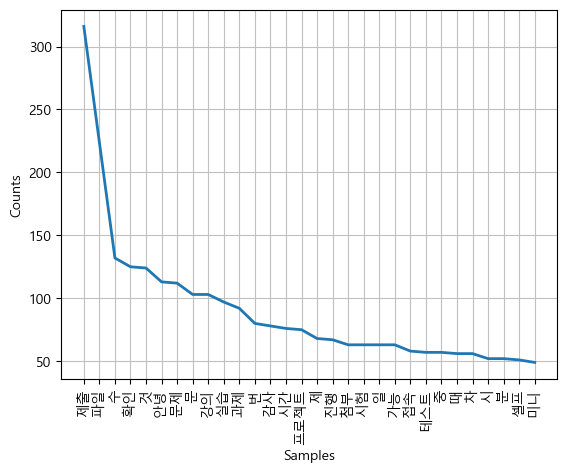

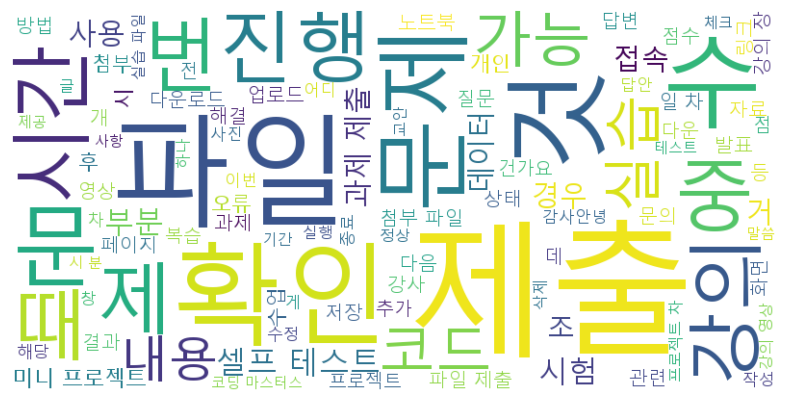

원격
-------------------------------------------
              len
count  100.000000
mean    84.020000
std     86.997037
min      9.000000
25%     39.750000
50%     58.000000
75%    104.250000
max    683.000000


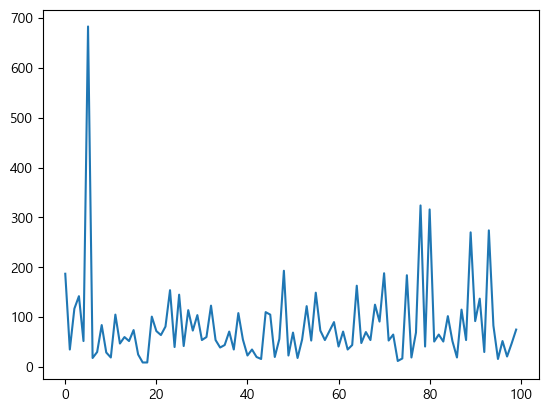

[('원격', 98), ('지원', 51), ('부탁', 26), ('요청', 26), ('수', 23), ('오류', 19), ('실행', 17), ('해결', 15), ('감사', 15), ('안녕', 15)]


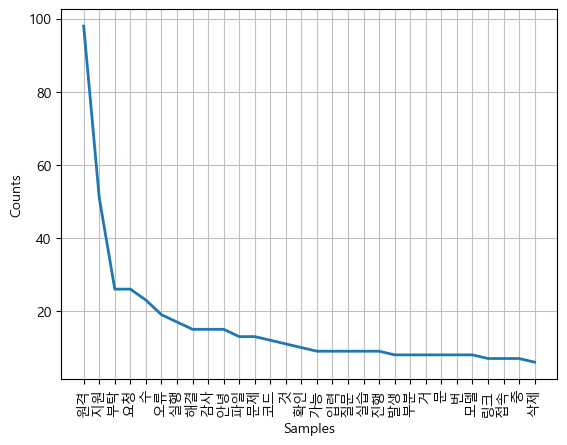

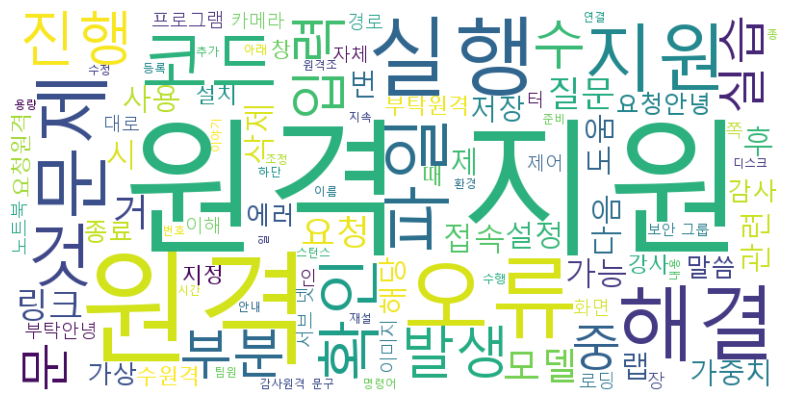

웹
-------------------------------------------
              len
count   732.00000
mean    184.84153
std     448.83214
min      13.00000
25%      60.00000
50%     101.00000
75%     172.00000
max    5690.00000


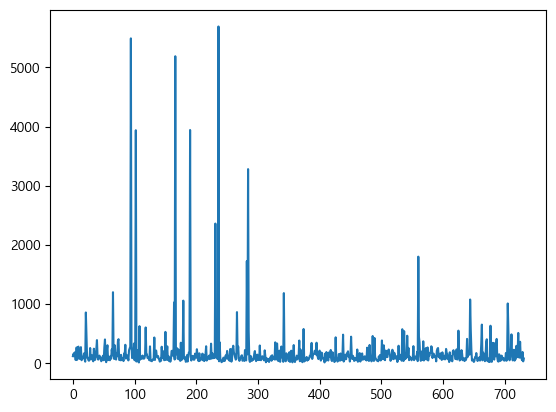

[('실습', 159), ('오류', 146), ('수', 142), ('것', 137), ('파일', 123), ('실행', 123), ('진행', 109), ('부분', 108), ('때', 99), ('안녕', 99)]


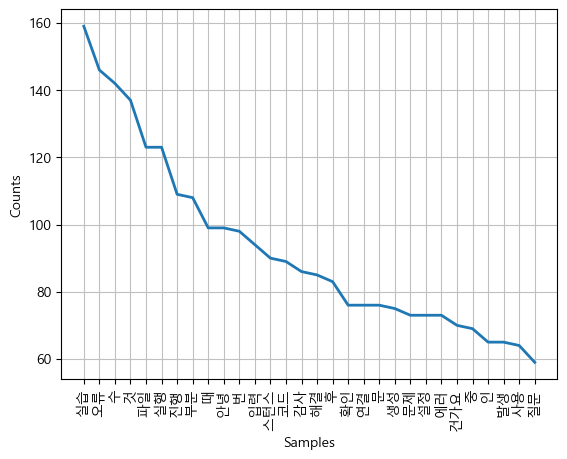

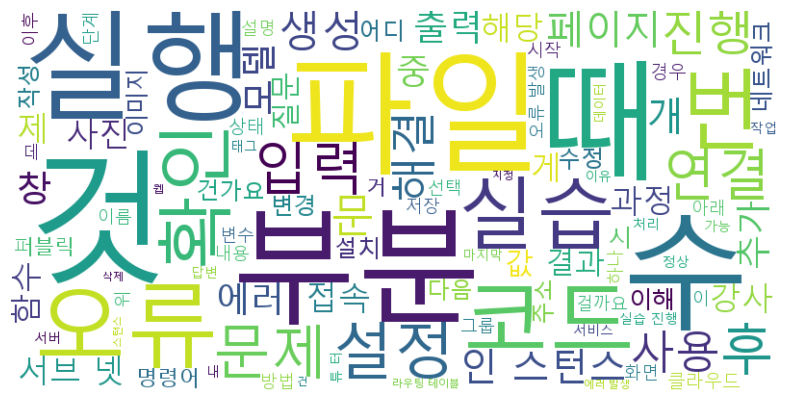

이론
-------------------------------------------
              len
count  728.000000
mean   138.668956
std    101.730658
min     13.000000
25%     71.000000
50%    110.000000
75%    178.250000
max    915.000000


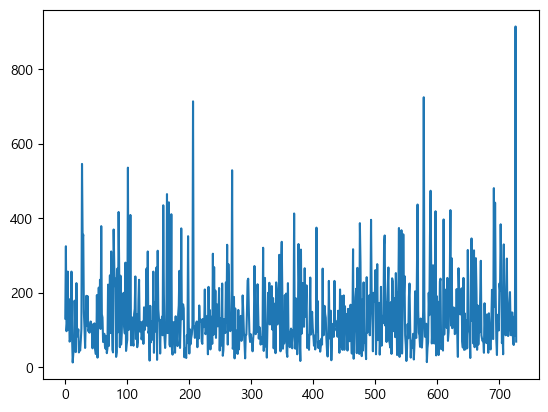

[('것', 375), ('데이터', 276), ('때', 209), ('수', 199), ('값', 198), ('실습', 172), ('경우', 162), ('변수', 158), ('이해', 151), ('질문', 146)]


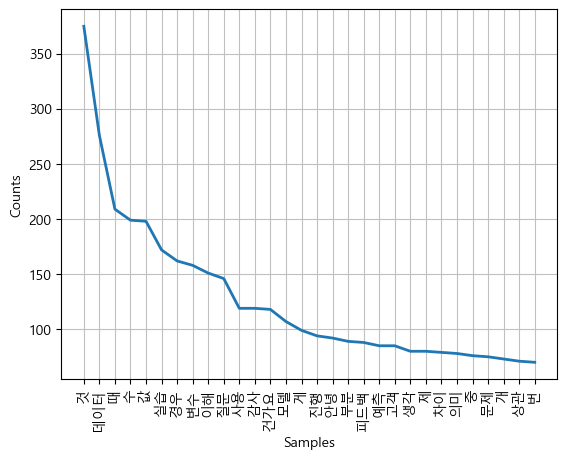

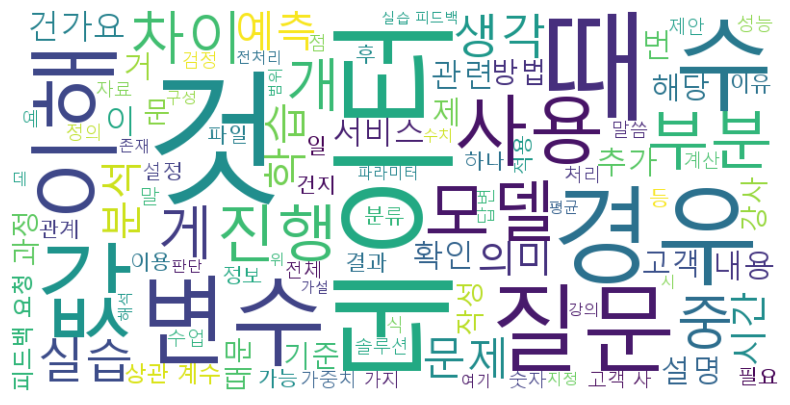

코드1
-------------------------------------------
               len
count   488.000000
mean    333.356557
std     316.485935
min      12.000000
25%     124.000000
50%     242.500000
75%     414.000000
max    2655.000000


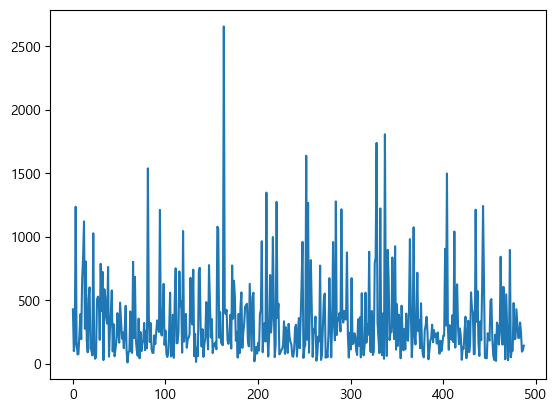

[('문제', 266), ('값', 244), ('수', 239), ('입력', 237), ('출력', 216), ('코드', 203), ('번', 179), ('것', 166), ('때', 151), ('경우', 149)]


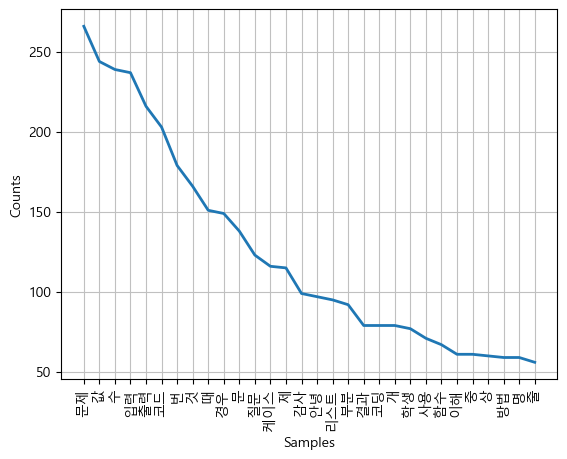

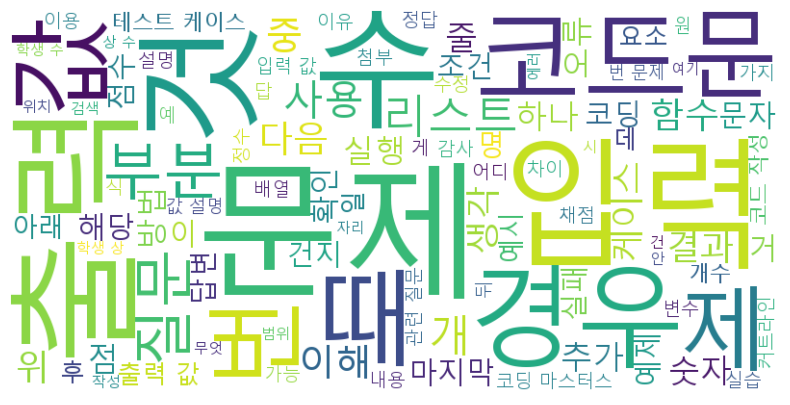

코드2
-------------------------------------------
               len
count  1097.000000
mean    261.750228
std     398.162267
min      13.000000
25%      90.000000
50%     158.000000
75%     285.000000
max    6012.000000


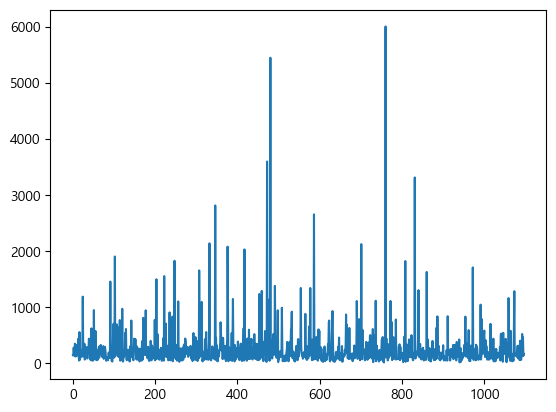

[('데이터', 405), ('코드', 336), ('값', 303), ('것', 280), ('오류', 253), ('수', 251), ('때', 195), ('문제', 186), ('부분', 173), ('에러', 170)]


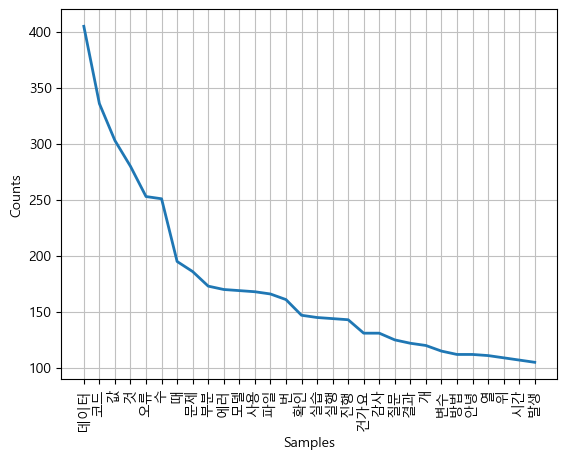

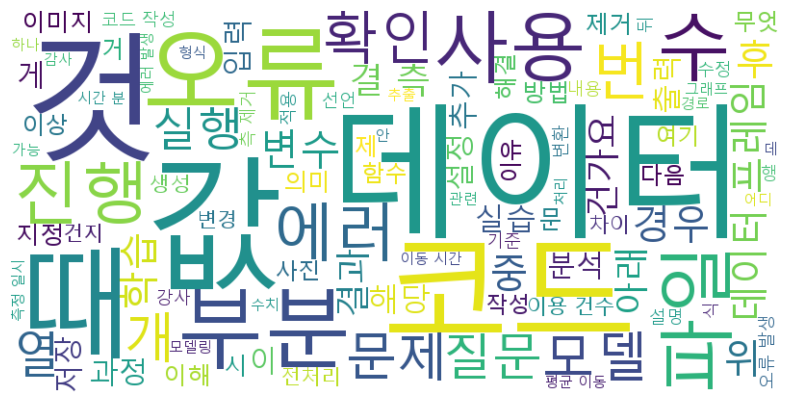

In [ ]:
for label in sorted(df.label.unique()):
  print('===========================================')
  print('===========================================')
  print(label)
  print('-------------------------------------------')
  text_analysis(df,label)
  print('===========================================')
  print('===========================================')

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [17]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
df['label'] = df['label'].map(label_dict)
df.head()

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0


## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [18]:
def re(text):
  import re
  return re.sub('[^a-zA-Z0-9\n\.]', ' ', text)

df['text'] = df['text'].apply(re)

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [19]:
# tokenize

from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer

okt = Okt()

def tokenize(text):
  return okt.morphs(text)

df['tokenize_text'] = df['text'].apply(tokenize)

df.head()

,text,label,tokenize_text
0,self.convs1 nn.ModuleList nn.Conv2d 1 Co ...,0,"[self, ., convs, 1, nn, ., ModuleList, nn, ., ..."
1,...,1,"[..., .., .]"
2,glob.glob PATH .\n\nPATH ...,0,"[glob, ., glob, PATH, ., \n\n, PATH, ., \n\n ..."
3,tmpp tmp.groupby by Addr1 as index Fals...,0,"[tmpp, tmp, ., groupby, by, Addr, 1, as, index..."
4,filename TEST IMAGE str round frame sec ...,0,"[filename, TEST, IMAGE, str, round, frame, sec..."


In [20]:
vectorizer = CountVectorizer(ngram_range=(1, 3))

X = vectorizer.fit_transform([' '.join(doc) for doc in df['tokenize_text']]).toarray()

y = df['label'].values

In [21]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
y

array([0, 1, 0, ..., 2, 4, 2])

In [23]:
X.shape, y.shape

((3706, 50132), (3706,))

### 6-3. Train Validation split

In [63]:
from sklearn.model_selection import train_test_split
X_n_train, X_n_val, y_n_train , y_n_val = train_test_split(X, y, test_size=0.25)

In [64]:
X_n_train.shape, X_n_val.shape, y_n_train.shape , y_n_val.shape

((2779, 50132), (927, 50132), (2779,), (927,))

### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [52]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-525
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

문장 길이 평균:  16.92849433351322
문장 길이 최대값:  805
문장 길이 최소값:  0
문장 길이 중간값:  6


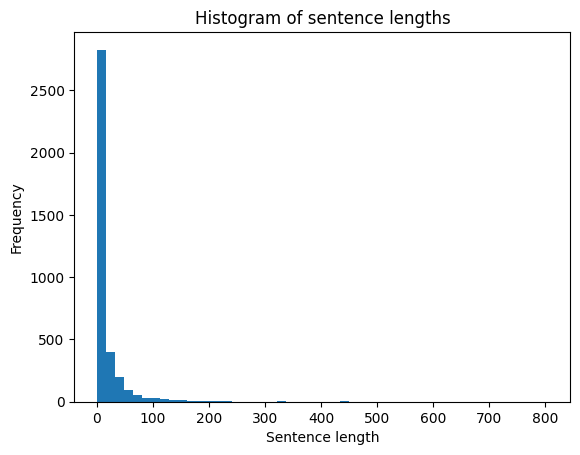

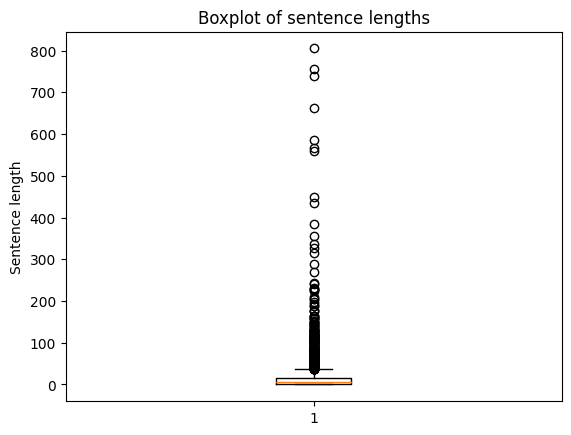

In [57]:
# 필요한 라이브러리 import
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# 토크나이저 정의 및 단어 사전 생성
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

# 문장 길이 분포 살펴보기
sentences = df['text'].tolist()
sentence_lengths = [len(sentence.split()) for sentence in sentences]

# 기초통계량 확인
print("문장 길이 평균: ", sum(sentence_lengths)/len(sentence_lengths))
print("문장 길이 최대값: ", max(sentence_lengths))
print("문장 길이 최소값: ", min(sentence_lengths))
print("문장 길이 중간값: ", sorted(sentence_lengths)[len(sentence_lengths)//2])

# 히스토그램 그리기
plt.hist(sentence_lengths, bins=50)
plt.title('Histogram of sentence lengths')
plt.xlabel('Sentence length')
plt.ylabel('Frequency')
plt.show()

# 박스플롯 그리기
plt.boxplot(sentence_lengths)
plt.title('Boxplot of sentence lengths')
plt.ylabel('Sentence length')
plt.show()

# 정수 시퀀스로 변환
sequences = tokenizer.texts_to_sequences(df['text'])

# 시퀀스 패딩
max_len = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [62]:
print(padded_sequences)
print(padded_sequences.shape)

[[  29 3028 1579 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 [ 527  527   87 ...    0    0    0]
 ...
 [2185 2194 3027 ...    0    0    0]
 [ 209   53  150 ...    0    0    0]
 [  71   52    0 ...    0    0    0]]
(3706, 869)


### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [79]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index_to_key)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [80]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize




# 텍스트를 전처리합니다.
df['tokenized_text'] = df['text'].apply(lambda x: word_tokenize(x.lower()))

# Word2Vec 모델을 학습합니다.
model = Word2Vec(df['tokenized_text'], min_count=1, vector_size=100, workers=4)

# 문장 임베딩을 구합니다.
df['embedding'] = get_dataset(df['tokenized_text'], model, 100)


ValueError: ignored

In [82]:
df['tokenized_text']

0       [self.convs1, nn.modulelist, nn.conv2d, 1, co,...
1                                            [..., .., .]
2       [glob.glob, path, ., path, ., aivle, 3rd, team...
3       [tmpp, tmp.groupby, by, addr1, as, index, fals...
4       [filename, test, image, str, round, frame, sec...
                              ...                        
3701    [train, val, train, set, val, set, countvetori...
3702                                                   []
3703    [cacoo, packet, tracer, 1., it, ., ., ..., 2.,...
3704                         [inplace, true, none, ., ..]
3705                                           [p, value]
Name: tokenized_text, Length: 3706, dtype: object

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [89]:
import scipy.sparse as sp
X = sp.csr_matrix(X)
y = sp.csr_matrix(y)
padded_sequences = sp.csr_matrix(padded_sequences)


sp.save_npz('/drive/MyDriveX_ngram.npz', X)
sp.save_npz('y.npz', y)
sp.save_npz('X_seq.npz',padded_sequences)